# Titanic - Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Get Started

In [3]:
titanic_df = pd.read_csv('/content/train.csv',index_col=False)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.drop('Name' , axis=1 ,inplace=True)

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Explore Data numerical and non numerical

In [8]:
# list all non numerical features
for col in titanic_df.columns:
  if titanic_df[col].dtype == 'object':
    print(col)

Sex
Ticket
Cabin
Embarked


In [9]:
# # list all numerical features
for col in titanic_df.columns:
  if not titanic_df[col].dtype == 'object':
    print(col)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [10]:
titanic_df.shape

(891, 11)

## Explore Data analyse

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


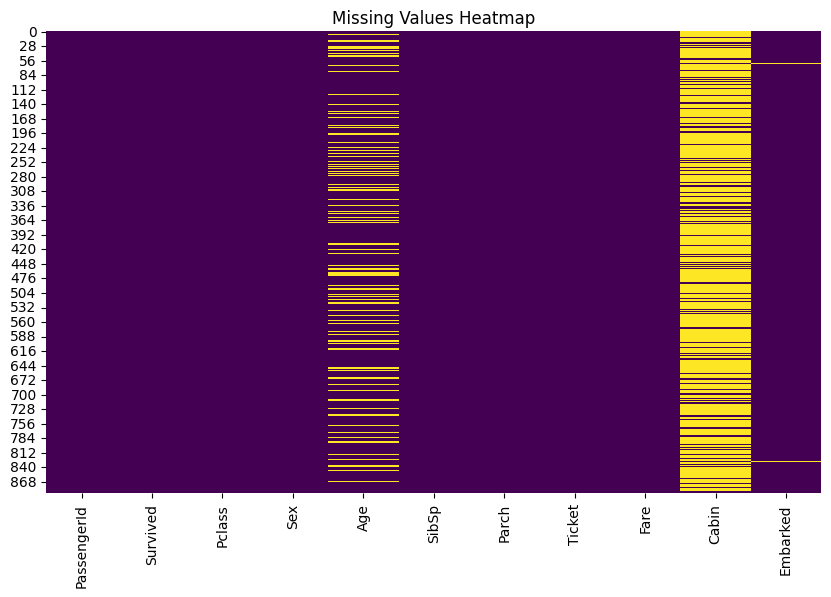

In [11]:
# Check for missing values
print(titanic_df.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


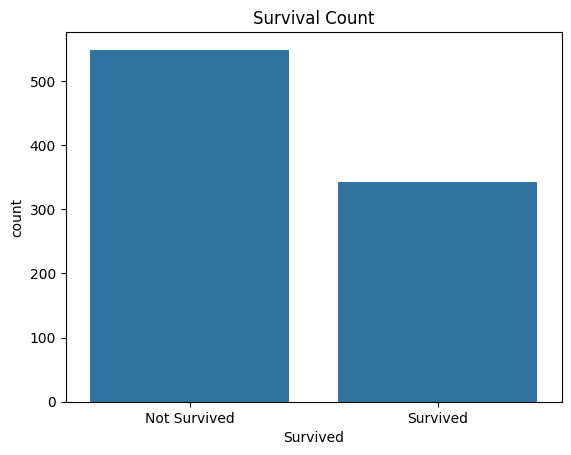

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [53]:
# Distribution of Survived target
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Survival Rate
print(titanic_df['Survived'].value_counts(normalize=True))


### Categorical Features vs Survival

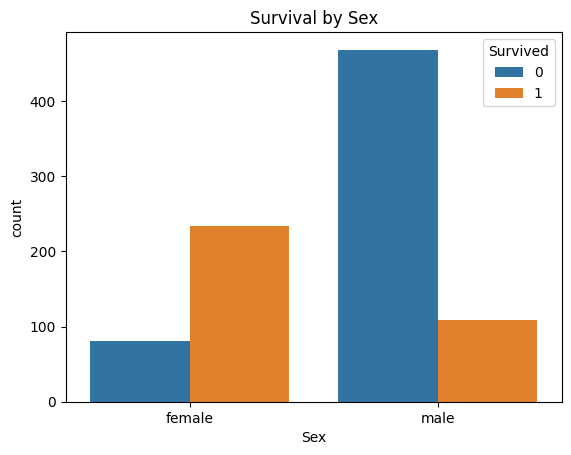

In [54]:
# Distribution Survised By Sex
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Sex')
plt.show()


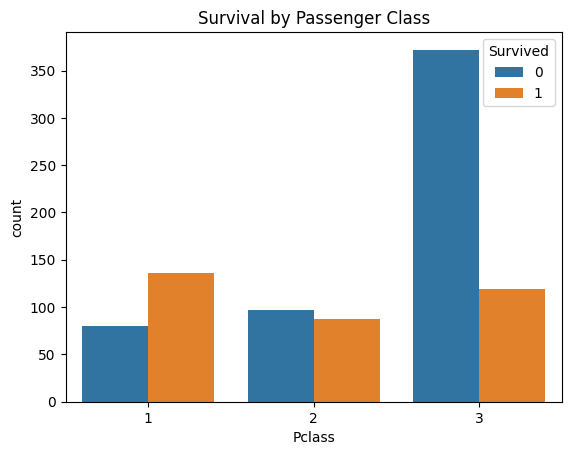

In [55]:
# Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

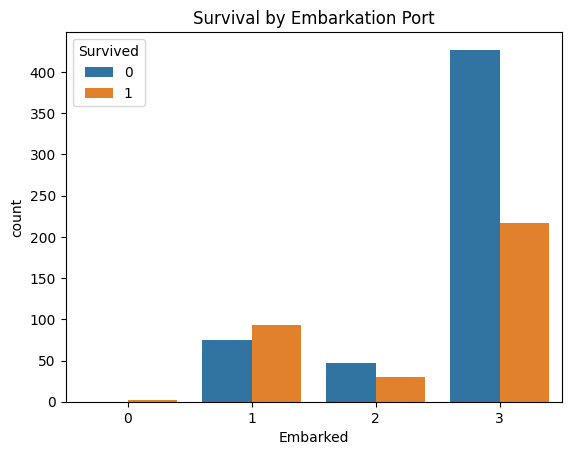

In [56]:
# Embarked vs Survived
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

### Numerical Features vs Survival

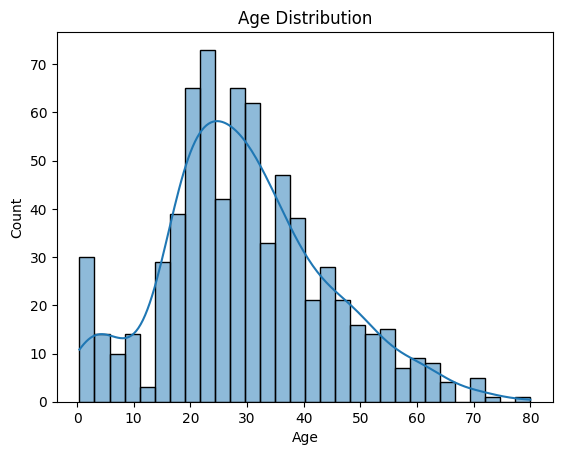

In [57]:
# Age distribution
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

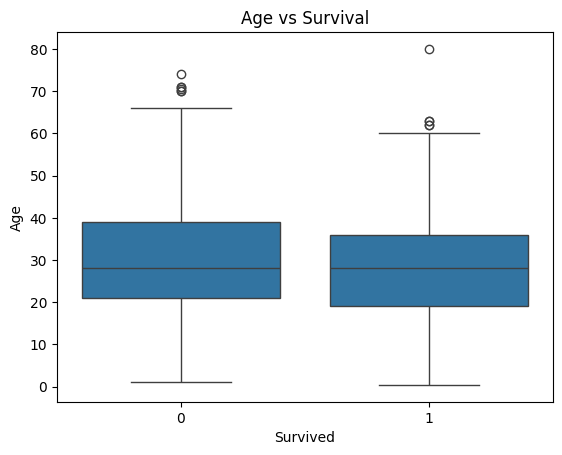

In [58]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age vs Survival')
plt.show()

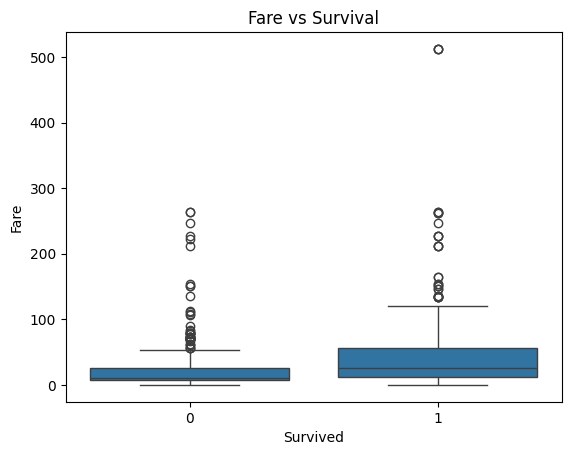

In [59]:
# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

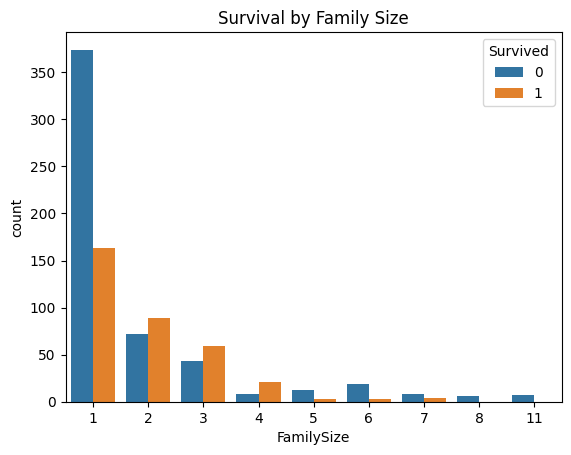

In [60]:
# Family Size Feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.title("Survival by Family Size")
plt.show()


## Data Cleaning

Let's convert all features that have non nmerical data type into categories data type

###Convert String into Categories

In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    category
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    category
 10  Embarked     889 non-null    category
 11  FamilySize   891 non-null    int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 88.0 KB


In [14]:
# turn all non numerical features into categories
for label , content in titanic_df.items():
  if pd.api.types.is_object_dtype(content):
    titanic_df[label] = content.astype('category').cat.as_ordered()

In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    category
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    category
 10  Embarked     889 non-null    category
 11  FamilySize   891 non-null    int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 88.0 KB


In [68]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


#### Save Reprocessed Data

In [71]:
df=titanic_df.copy()

In [72]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    category
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    category
 10  Embarked     889 non-null    category
 11  FamilySize   891 non-null    int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 88.0 KB


In [74]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


### Fill missing value for numerical value

In [78]:
for label , content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # df[label+'_is_missing'] = pd.isnull(content)
      df[label] = content.fillna(content.median())

In [79]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,1


### Fill missing value for categories values

In [80]:
for label , content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
      # df[label+'_is_missing'] = pd.isnull(content)
      df[label] = pd.Categorical(content).codes+1

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,1,26.0,0,0,670,7.9250,0,3
3,4,1,1,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,2,35.0,0,0,473,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0,102,13.0000,0,3
887,888,1,1,1,19.0,0,0,15,30.0000,31,3
888,889,0,3,1,28.0,1,2,676,23.4500,0,3
889,890,1,1,2,26.0,0,0,9,30.0000,61,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int16  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int16  
 10  Embarked     891 non-null    int8   
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int16(2), int64(6), int8(2)
memory usage: 61.0 KB


In [82]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


## Modeling

### Split data

In [83]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,2,22.0,1,0,524,7.2500,0,3,2
1,2,1,1,1,38.0,1,0,597,71.2833,82,1,2
2,3,1,3,1,26.0,0,0,670,7.9250,0,3,1
3,4,1,1,1,35.0,1,0,50,53.1000,56,3,2
4,5,0,3,2,35.0,0,0,473,8.0500,0,3,1


In [84]:
X=df.drop('Survived',axis=1)
y=df['Survived']

## import test data

In [85]:
test_data = pd.read_csv('test.csv')

In [86]:
test_data.drop('Name',axis=1,inplace=True)

In [87]:
def clean_data(df):

  # convert features that have object as datatype into categries
   for label , content in df.items():
     if pd.api.types.is_object_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

  # fill missing value in nmerical features
   for label , content in df.items():
       if pd.api.types.is_numeric_dtype(content):
          if pd.isnull(content).sum():
            #  df[label+'_is_missing'] = pd.isnull(content)
             df[label] = content.fillna(content.median())


    # convet categries features into number
   for label , content in df.items():
       if not pd.api.types.is_numeric_dtype(content):
          # df[label+'_is_missing'] = pd.isnull(content)
          df[label] = pd.Categorical(content).codes+1
   return df

In [88]:
test_data = clean_data(test_data)

In [89]:
test_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,2,34.5,0,0,153,7.8292,0,2
1,893,3,1,47.0,1,0,222,7.0000,0,3


In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,1,38.0,1,0,597,71.2833,82,1


### choose the model

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report ,precision_score , recall_score , f1_score, roc_auc_score , roc_curve


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred) # Calculate roc_auc_score

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # Calculate roc_auc_score

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- roc_auc_score: {:.4f}".format(model_train_roc_auc))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))

    print("- roc_auc_score: {:.4f}".format(model_test_roc_auc))
    print('='*35)
    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7584
- Precision: 0.7243
- Recall: 0.5784
- F1 score: 0.7518
- roc_auc_score: 0.7227
----------------------------------
Model performance for Test set
- Accuracy: 0.7263
- Precision: 0.7193
- Recall: 0.5541
- F1 score: 0.7187
- roc_auc_score: 0.7008


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7654
- Precision: 0.7105
- Recall: 0.7297
- F1 score: 0.7658
- roc_auc_score: 0.7601


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8268
- Precision: 0.8308
- Recall: 0.7297
- F1 score: 0.8248
- roc_auc_score: 0.8125




We decide choose Logitic regression model

In [94]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred =log_reg.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

##HyperParameter

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the model
log_reg = LogisticRegression()

# Define hyperparameter space
param_dist = {
    'C': loguniform(0.001, 100),  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Make sure compatible with penalty
    'max_iter': [100, 200, 300, 500]
}

# Randomized search
search = RandomizedSearchCV(
    log_reg, param_distributions=param_dist,
    n_iter=50, scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Fit on data (replace X and y with your data)
search.fit(X, y)

# Best parameters
print("Best Parameters:", search.best_params_)


Best Parameters: {'C': np.float64(0.0945695189734589), 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
170 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [145]:
search.best_params_

{'C': np.float64(0.0945695189734589),
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# retrain my model by giving value best params
best_model = LogisticRegression(
    C=0.09,                # Use your actual best C
    penalty='l2',         # Use your best penalty
    solver='lbfgs',       # Use your best solver
    max_iter=500,         # Best iteration
    random_state=42
)

best_model.fit(X_train, y_train)

# 3. Make predictions
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
accuracy_score(y_test,y_pred)

0.8044692737430168

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [154]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [155]:
y_preds_rndm_forest = random_forest.predict(X_test)

In [156]:
print(classification_report(y_test,y_preds_rndm_forest))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [157]:
accuracy_score(y_test,y_preds_rndm_forest)

0.8156424581005587

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 1000),          # number of trees
    'max_depth': randint(3, 30),                 # max depth of each tree
    'min_samples_split': randint(2, 10),         # min samples to split a node
    'min_samples_leaf': randint(1, 10),          # min samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2'],    # number of features to consider
    'bootstrap': [True, False]                   # bootstrap samples
}


In [159]:
search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

search_rf.fit(X, y)  # Use your full features and labels here


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab4e72cb9d0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab4e72b8710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab4e7168c50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab4e72d6fd0>},
                   random_state=42, scoring='accuracy')

In [160]:
best_rf = RandomForestClassifier(
    n_estimators=search_rf.best_params_['n_estimators'],
    max_depth=search_rf.best_params_['max_depth'],
    min_samples_split=search_rf.best_params_['min_samples_split'],
    min_samples_leaf=search_rf.best_params_['min_samples_leaf'],
    max_features=search_rf.best_params_['max_features'],
    bootstrap=search_rf.best_params_['bootstrap'],
    random_state=42
)

In [161]:
# Train
best_rf.fit(X_train, y_train)

# Predict
y_pred = best_rf.predict(X_test)

In [162]:
print(accuracy_score(y_test,y_pred))

0.8100558659217877


In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [165]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import loguniform, randint

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [166]:
# Define the model
svc = SVC()

# Search space
param_dist = {
    'C': loguniform(0.001, 1000),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': randint(2, 5)  # used only for poly kernel
}


In [167]:
search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

search_svc.fit(X_train_scaled, y_train)
print("Best Parameters:", search_svc.best_params_)


Best Parameters: {'C': np.float64(2.5480149212968444), 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [168]:
best_svc = SVC(
    C=search_svc.best_params_['C'],
    kernel=search_svc.best_params_['kernel'],
    gamma=search_svc.best_params_['gamma'],
    degree=search_svc.best_params_['degree'],
    random_state=42
)

best_svc.fit(X_train_scaled, y_train)
y_pred = best_svc.predict(X_test_scaled)


In [169]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## prediction on eal Dataset

In [185]:
real_data = pd.read_csv('test.csv')

In [171]:
real_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [172]:
real_data.drop('Name',axis=1,inplace=True)

In [173]:
def clean_data(df):

  # convert features that have object as datatype into categries
   for label , content in df.items():
     if pd.api.types.is_object_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

  # fill missing value in nmerical features
   for label , content in df.items():
       if pd.api.types.is_numeric_dtype(content):
          if pd.isnull(content).sum():
             df[label+'_is_missing'] = pd.isnull(content)
             df[label] = content.fillna(content.median())


    # convet categries features into number
   for label , content in df.items():
       if not pd.api.types.is_numeric_dtype(content):
          df[label+'_is_missing'] = pd.isnull(content)
          df[label] = pd.Categorical(content).codes+1
   return df









In [174]:
df=clean_data(real_data)

In [193]:
def clean_data2(df):
    """
    Cleans the input DataFrame to prepare it for prediction.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Convert features that have object as datatype into categories
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

    # Fill missing value in numerical features
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

    # Convert categories features into number
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

    # Ensure the DataFrame has the same columns as the training data
    # Get the columns used during training
    # Assuming 'X' is the training data used for your model
    training_columns = X.columns

    # Align the columns in 'df' with the training columns
    # Add missing columns (filled with 0)

    return df

In [194]:
real_data = pd.read_csv('test.csv')
real_data.drop('Name', axis=1, inplace=True)

# Clean and align real_data
real_data_cleaned = clean_data(real_data)

# Make predictions using best_svc (Your SVC model)
y_pred = best_svc.predict(real_data_cleaned)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [196]:
y_pred.min()

np.int64(1)

In [40]:
test_data.shape

(418, 10)

In [41]:
X.shape

(891, 10)

In [42]:
reg_model = LogisticRegression()
reg_model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = reg_model.predict(test_data)

In [44]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,2,34.5,0,0,153,7.8292,0,2
1,893,3,1,47.0,1,0,222,7.0000,0,3
2,894,2,2,62.0,0,0,74,9.6875,0,2
3,895,3,2,27.0,0,0,148,8.6625,0,3
4,896,3,1,22.0,1,1,139,12.2875,0,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,268,8.0500,0,3
414,1306,1,1,39.0,0,0,325,108.9000,23,1
415,1307,3,2,38.5,0,0,347,7.2500,0,3
416,1308,3,2,27.0,0,0,221,8.0500,0,3


In [48]:
gender_submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

In [49]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
gender_submission.to_csv('/content/predict/gender_submission.csv', index=False)